## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 5.4: Plot HI emission and absorption spectra from the Southern Galactic Plane survey

#### uses fits file downloaded from Southern Galactic Plane Survey (https://data.csiro.au/dap/landingpage?execution=e2s2)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
%matplotlib inline

In [16]:
# read in data
# this is 427 MByte and too big to be included in the github repo
# you need to download from https://data.csiro.au/dap/landingpage?execution=e2s2
hdu = fits.open('SGPS_g010.hi.fits')

In [17]:
im = hdu[0].data
hd = hdu[0].header
hdu.close()

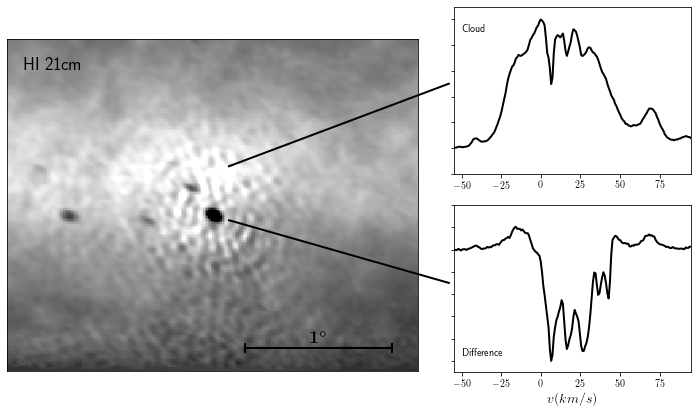

In [18]:
fig = plt.figure(figsize=(10,7.25))
ax1 = fig.add_axes([0.02,0.02,0.57,0.94])

# remove first axis which has length 1
im = np.squeeze(im)

i = 1 + np.arange(hd['NAXIS1'])
lon = hd['CRVAL1'] + (i - hd['CRPIX1']) * hd['CDELT1']
j = 1 + np.arange(hd['NAXIS2'])
lat = hd['CRVAL2'] + (i - hd['CRPIX2']) * hd['CDELT2']
k = 1 + np.arange(hd['NAXIS3'])
v = hd['CRVAL3'] + (k - hd['CRPIX3']) * hd['CDELT3']
v /= 1000

imin,imax = 215, 475
#print(lon[imin],lon[imax])
jmin, jmax = 0, 210
#print(lat[jmin],lat[jmax])

# -50 to +100 km/s
kmin, kmax = 100, 298
#print(v[kmin], v[kmax])
v1 = v[kmin:kmax+1]

imsub = im[kmin:kmax+1, jmin:jmax+1, imin:imax+1]


# integrated map
map = np.sum(imsub, axis=0)
#print(map.min(), map.max())
ax1.imshow(map, vmin=2000, vmax=11500, cmap='gray', origin='lower')
ax1.tick_params(axis='both', which='both', length=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

# scale bar
dx = hd['CDELT1']
# 40'' per pixel, make bar 1 deg = 90 pix
xbar = 93
x0 = 150
x1 = x0 + xbar
y0 = 14
dy = 2.5
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
ax1.plot([x0,x1],[y0,y0], 'k-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'k-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'k-', lw=2)
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax1.text(0.5*(x0+x1), y0+1.5*dy, r'$\boldsymbol{1^\circ}$', color='black', fontsize=18, fontweight='heavy', ha='center')
ax1.text(0.04,0.91,'HI 21cm', {'color': 'k', 'fontsize': 18}, transform=ax1.transAxes)


# absorption spectrum on source
i1 = 347
j1 = 99
TB1 = im[kmin:kmax+1, j1, i1]
TB1 /= np.abs(TB1.min())
ax2 = fig.add_axes([0.64,0.17,0.33,0.32])
ax2.plot(v1,TB1,'k',lw=2)
#ax2.get_yaxis().set_ticks([])
ax2.set_yticklabels([])
#ax2.set_xlim(-60,100)
ax2.set_xlim(-55,95)
ax2.set_ylim(-1.1,0.4)
ax2.set_xlabel(r'$v (km/s)$', fontsize=14)
plt.text(-50,-0.95, 'Difference')

# emission spectrum
# take mean of an annulus around the absorption to smooth out small scale structure
r = 10     # pix
n = 41
TB2 = im[kmin:kmax+1, j1, i1] * 0
for m in np.arange(n):
    theta = m*2*np.pi/(n-1)
    i2 = i1 + int(r*np.sin(theta) + 0.5)
    j2 = j1 + int(r*np.cos(theta) + 0.5)
    T2 = im[kmin:kmax+1, j2, i2]
    TB2 += im[kmin:kmax+1, j2, i2]

TB2 /= TB2.max()
ax3 = fig.add_axes([0.64,0.55,0.33,0.32])
ax3.plot(v1,TB2,'k',lw=2)
#ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlim(-60,100)
ax3.set_xlim(-55,95)
ax3.set_ylim(-0.2,1.1)
plt.text(-50,0.91, 'Cloud')


transFigure = fig.transFigure.inverted()
coord12 = transFigure.transform(ax1.transData.transform([140,98]))
coord2 = transFigure.transform(ax2.transData.transform([-58,-0.3]))
line12 = mpl.lines.Line2D((coord12[0],coord2[0]),(coord12[1],coord2[1]), color='k', ls='solid', lw=2, transform=fig.transFigure)
coord13 = transFigure.transform(ax1.transData.transform([140,121]))
coord3 = transFigure.transform(ax3.transData.transform([-58,0.5]))
line13 = mpl.lines.Line2D((coord13[0],coord3[0]),(coord13[1],coord3[1]), color='k', ls='solid', lw=2, transform=fig.transFigure)
fig.lines = line12, line13,

plt.savefig('HI_spectra.pdf')